In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# this file is just a small sample
df = pd.read_csv("data/miniterrain.csv")

In [3]:
df.head()

,bumpiness,grade,target
0,0.832143,0.980161,1.0
1,0.530852,0.934583,1.0
2,0.069974,0.502007,0.0
3,0.414885,0.056444,0.0
4,0.633748,0.897043,1.0


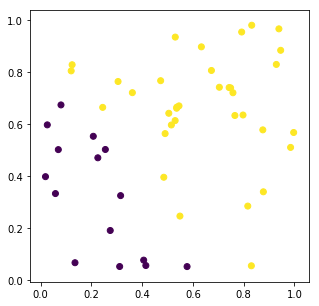

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.show()

In [6]:
from sklearn.svm import SVC

In [7]:
clf = SVC(kernel='linear')

In [8]:
X = df[["bumpiness","grade"]].values
y = df["target"]

In [9]:
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
# Now this was just with a subset. Let's put all the points.
df = pd.read_csv("data/terrain.csv")
df.shape

(1000, 3)

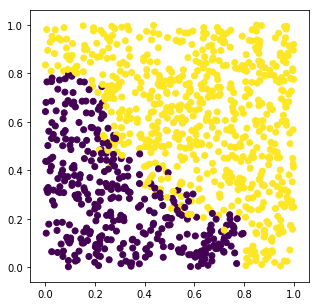

In [64]:
plt.figure(figsize=(5,5))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.show()

In [65]:
X = df[["bumpiness","grade"]].values
y = df["target"]

In [66]:
clf.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
from sklearn.model_selection import cross_val_score

In [118]:
X = df[["bumpiness","grade"]].values
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

clf=SVC(kernel='linear', C=0.1) #C is the error margin
clf.fit(X_train,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy').mean()

0.8604779411764707

In [121]:
# using a polynomic function
clf=SVC(kernel='poly', degree=3, C=1)
clf.fit(X_train,y_train)
cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy').mean()

0.8966577540106953

In [123]:
# using radians
clf=SVC(kernel='rbf', gamma=10, C=1)
clf.fit(X_train,y_train)
cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy').mean()

0.9364360516934047

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
clf1 = GridSearchCV(estimator=SVC(kernel='rbf', gamma=3, C=1),
                    param_grid={"gamma":[10,100,1000]},
                    scoring='accuracy'
                   )
clf1.fit(X,y)
clf1.best_params_

{'gamma': 10}

In [126]:
clf = SVC(**clf1.best_params_)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [127]:
clf.score(X_test, y_test)

0.9393939393939394

In [109]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [128]:
confusion_matrix(y_test, clf.predict(X_test))

array([[105,  13],
       [  7, 205]], dtype=int64)

In [130]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.94      0.89      0.91       118
        1.0       0.94      0.97      0.95       212

avg / total       0.94      0.94      0.94       330

